# **Diabetes Predict** 

### 🔬 Diabetes Predict 
Diabetes Predict is a machine learning project designed to estimate an individual’s risk of developing diabetes based on personal health metrics. By analyzing medical data such as blood glucose levels, BMI, blood pressure, age, and medical history, the model pinpoints high-risk groups early, enabling proactive prevention and timely intervention.

---

### ⚙️ Key Highlights

- Employs algorithms: Random Forest, K-Nearest Neighbors (KNN), and XGBoost  
- Preprocesses data using StandardScaler, reduces dimensions with PCA, and splits datasets via `train_test_split`  
- Evaluates model performance with accuracy, precision, recall, F1-score, and confusion matrix  
- Visualizes variable relationships through Matplotlib and Seaborn for deeper insights  

---

### 🎯 Objectives

- Detect diabetes risk at an early stage and facilitate prompt action  
- Reduce complications and lower healthcare costs  
- Improve the efficiency and impact of patient consultation and care plans

## Import libraries and Dataset

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install warnings
%pip install scikit-learn
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split



### Read Data

In [3]:
diabetes= pd.read_csv('D:/study/DS/diabetes_dataset.csv')
print('Data read successfully!')

Data read successfully!


## EDA

In [4]:
# Display the first 10 rows of the dataset
diabetes.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


### Descriptive Statistics

In [5]:
diabetes.shape

(100000, 9)

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
# Statistical summary of the dataset
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [8]:
# count of missing values in each column
diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
# Count the number of zero values in each column
(diabetes == 0).sum()

gender                     0
age                        0
hypertension           92515
heart_disease          96058
smoking_history            0
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes               91500
dtype: int64

### Check duplicate

In [10]:
# Check for duplicate values
print(f"Total duplicates: {diabetes.duplicated().sum()}")

df = diabetes.copy()
#remove duplicate values 
df = df.drop_duplicates()
print (f"__Removed Duplicates__" +'\n' + f"Total Duplicates: {df.duplicated().sum()}")

Total duplicates: 3854
__Removed Duplicates__
Total Duplicates: 0


In [11]:
df.columns = ['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Smoking_History',
              'BMI', 'HbA1c_Level', 'Blood_Glucose_Level', 'Diabetes']
print(df.columns)


Index(['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Smoking_History',
       'BMI', 'HbA1c_Level', 'Blood_Glucose_Level', 'Diabetes'],
      dtype='object')


In [12]:
for col in df.columns:
    print(f"- {col}: {df[col].unique()}")

- Gender: ['Female' 'Male' 'Other']
- Age: [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
- Hypertension: [0 1]
- Heart_Disease: [1 0]
- Smoking_History: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
- BMI: [25.19 27.32 23.45 ... 59.42 44.39 60.52]
- HbA1c_Level: [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
- Blood_Glucose_Level: [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220

### Counts Plots

- Minimum age: 0.08
- Maximum age: 80.0
- Average : 41.79432571297817
- Diabetes Counts:
Diabetes
0    87664
1     8482
Name: count, dtype: int64
- Age Statistics by Diabetes Status:
           min   max
Diabetes            
0         0.08  80.0
1         3.00  80.0


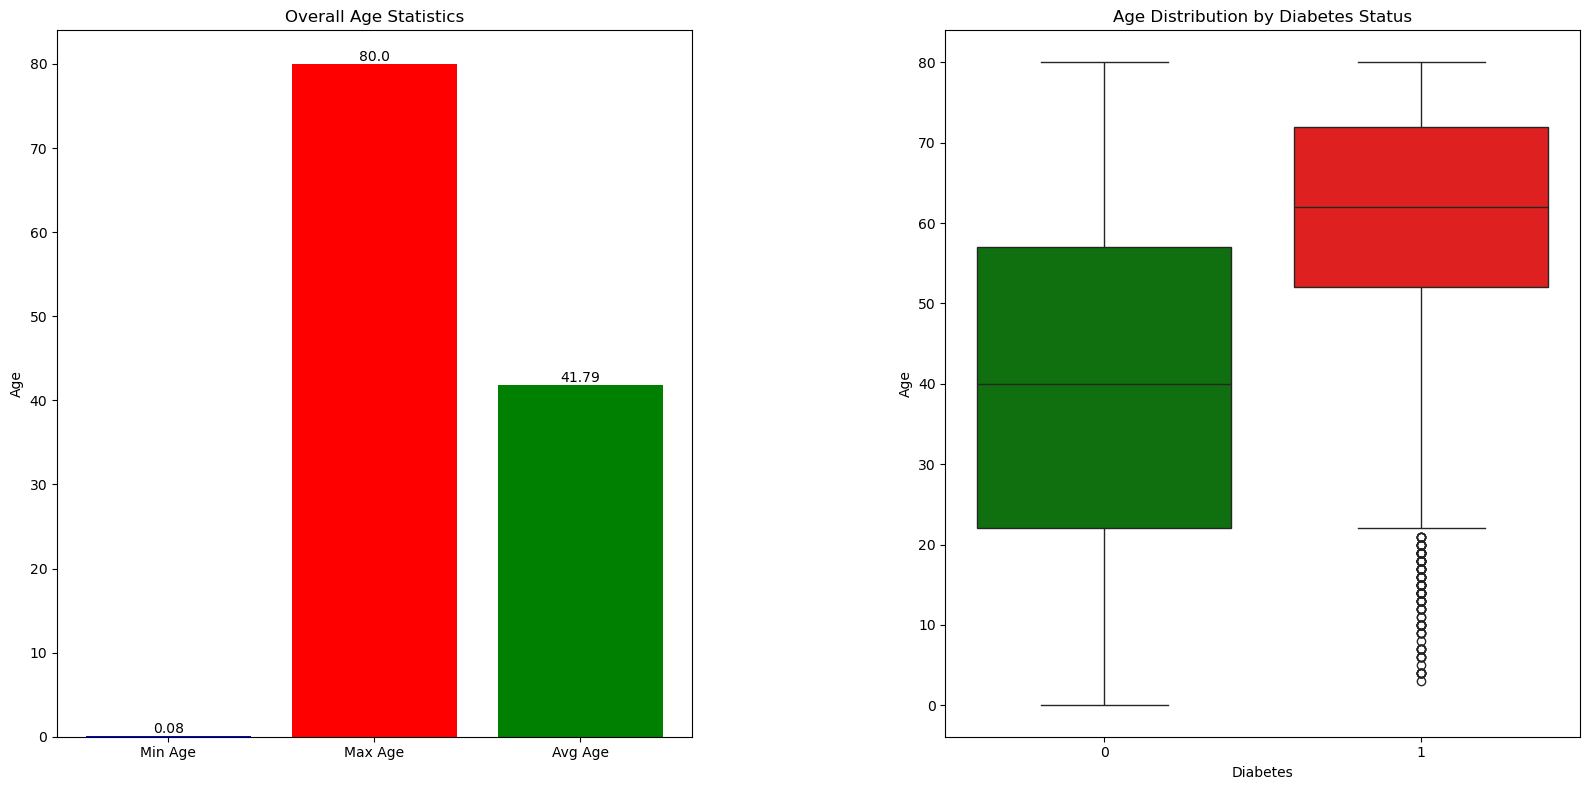

In [13]:
# Calculate minimum, maximum, and average age
min_age = df['Age'].min()
max_age = df['Age'].max()
avg_age = df['Age'].mean()

# Count of individuals with and without diabetes
diabetes_counts = df['Diabetes'].value_counts()

# Group by diabetes status and calculate min and max ages
grouped_ages = df.groupby('Diabetes')['Age'].agg(['min', 'max'])

# Print the results
print(f"- Minimum age: {min_age}")
print(f"- Maximum age: {max_age}")
print(f"- Average : {avg_age}")
print("- Diabetes Counts:")
print(diabetes_counts)
print("- Age Statistics by Diabetes Status:")
print(grouped_ages)

# Plot for overall min, max, and average age

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

bars = ax[0].bar(['Min Age', 'Max Age', 'Avg Age'], [min_age, max_age, avg_age], color=['blue', 'red', 'green'])
ax[0].set_title('Overall Age Statistics')
ax[0].set_ylabel('Age')

for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Box plot for age distribution by diabetes
sns.boxplot(
    ax=ax[1],
    x='Diabetes',
    y='Age',
    data=df,
    palette={'0': 'green', '1': 'red'}
)
ax[1].set_title('Age Distribution by Diabetes Status')
ax[1].set_xlabel('Diabetes')
ax[1].set_ylabel('Age')

plt.tight_layout()
plt.subplots_adjust(wspace=0.4) 
plt.show()


- **The minimum age of a person with diabetes is 3 years old.**
- **The maximum age of a person with diabetes is 80 years old.**
- **The average age in the dataset is 69 years old.**
- **Diabetes is concentrated in people over 50 years old**

In [14]:
# Converting datatype of hypertension and heart_disease columns to category
df.Age = df.Age.astype(int)
df.Hypertension = df.Hypertension.astype('int')
df.Heart_Disease = df.Heart_Disease.astype('int')
df.Diabetes = df.Diabetes.astype('int')

In [15]:
num = df.select_dtypes('number').columns
num

Index(['Age', 'Hypertension', 'Heart_Disease', 'BMI', 'HbA1c_Level',
       'Blood_Glucose_Level', 'Diabetes'],
      dtype='object')

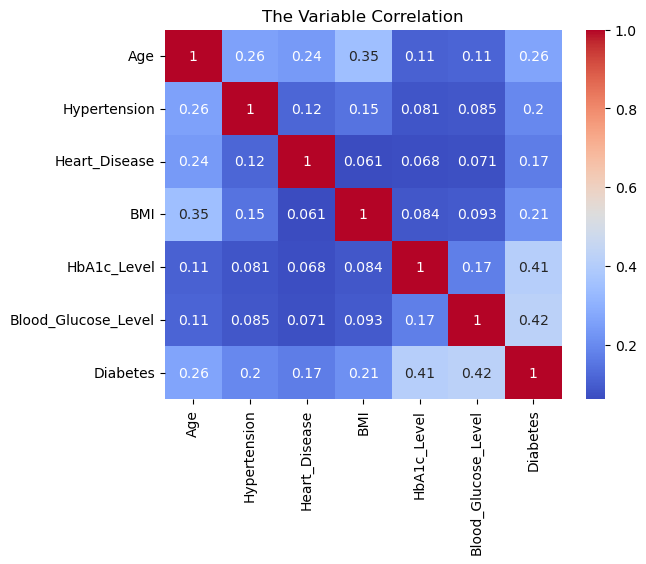

In [16]:
# The Variable correlation heatmap (numeric columns only)
#df['Diabetes'] = df['Diabetes'].astype(int)


numeric_cols = ['Age', 'Hypertension', 'Heart_Disease', 'BMI', 'HbA1c_Level', 'Blood_Glucose_Level', 'Diabetes']
corr = df[numeric_cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('The Variable Correlation')
plt.show()

Based on the heatmap, we can see the correlation between the factors that can lead to diabetes prevalence and support the selection of features for training the machine learning model:

- **HbA1c_Level** and **Blood_Glucose_Level** have the highest correlation coefficient with Diabetes (~0.40), indicating that these are the two most important factors leading to diabetes.

- **Age** also has a significant correlation with diabetes (~0.26), indicating that age is a clear risk factor.

- **Hypertension** and **BMI** have a moderate correlation (~0.20), indicating that they also contribute to the likelihood of developing the disease but not as strongly as the above indicators.

- **Heart_Disease** has a lower correlation (~0.17), indicating a certain influence but not a decisive factor.
- The remaining variables have low correlation, and have little direct impact on the likelihood of diabetes.
- Heatmap helps to quickly identify prominent features, supporting effective feature selection for the prediction model.

###  Encode Data

In [17]:
# Doing One-Hot Encoding of Gender and Smoking_History columns

df_encoded = pd.get_dummies(df[['Gender', 'Smoking_History']], drop_first=True)
df_encoded.head()


,Gender_Male,Gender_Other,Smoking_History_current,Smoking_History_ever,Smoking_History_former,Smoking_History_never,Smoking_History_not current
0,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False
2,True,False,False,False,False,True,False
3,False,False,True,False,False,False,False
4,True,False,True,False,False,False,False


In [18]:
# Concatenate the original dataframe with the encoded columns
x = pd.concat([df, df_encoded], axis=1)
x.head(10)

,Gender,Age,Hypertension,Heart_Disease,Smoking_History,BMI,HbA1c_Level,Blood_Glucose_Level,Diabetes,Gender_Male,Gender_Other,Smoking_History_current,Smoking_History_ever,Smoking_History_former,Smoking_History_never,Smoking_History_not current
0,Female,80,0,1,never,25.19,6.6,140,0,False,False,False,False,False,True,False
1,Female,54,0,0,No Info,27.32,6.6,80,0,False,False,False,False,False,False,False
2,Male,28,0,0,never,27.32,5.7,158,0,True,False,False,False,False,True,False
3,Female,36,0,0,current,23.45,5.0,155,0,False,False,True,False,False,False,False
4,Male,76,1,1,current,20.14,4.8,155,0,True,False,True,False,False,False,False
5,Female,20,0,0,never,27.32,6.6,85,0,False,False,False,False,False,True,False
6,Female,44,0,0,never,19.31,6.5,200,1,False,False,False,False,False,True,False
7,Female,79,0,0,No Info,23.86,5.7,85,0,False,False,False,False,False,False,False
8,Male,42,0,0,never,33.64,4.8,145,0,True,False,False,False,False,True,False
9,Female,32,0,0,never,27.32,5.0,100,0,False,False,False,False,False,True,False


In [19]:
# Converting datatype of hypertension and heart_disease columns to category
df.Age = df.Age.astype(int)
df.Hypertension = df.Hypertension.astype('category')
df.Heart_Disease = df.Heart_Disease.astype('category')
df.Diabetes = df.Diabetes.astype('category')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               96146 non-null  object  
 1   Age                  96146 non-null  int32   
 2   Hypertension         96146 non-null  category
 3   Heart_Disease        96146 non-null  category
 4   Smoking_History      96146 non-null  object  
 5   BMI                  96146 non-null  float64 
 6   HbA1c_Level          96146 non-null  float64 
 7   Blood_Glucose_Level  96146 non-null  int64   
 8   Diabetes             96146 non-null  category
dtypes: category(3), float64(2), int32(1), int64(1), object(2)
memory usage: 5.0+ MB


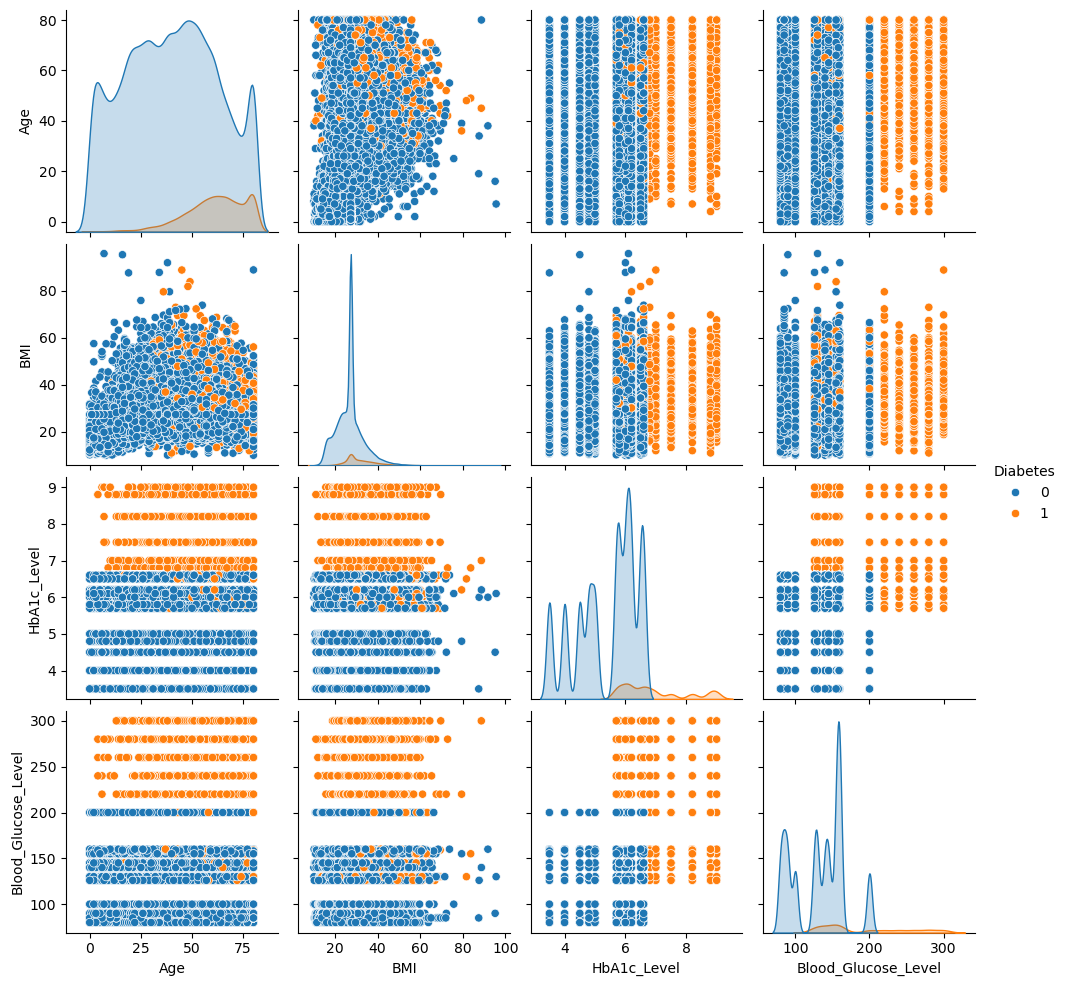

In [21]:
p = sns.pairplot(df, hue='Diabetes')

### **Data Distribution:**   
- Distribution plots (histogram, boxplot, KDE) show that the diabetic group has significantly higher HbA1c_Level and Blood_Glucose_Level values compared to the non-diabetic group. For example, the 75th percentile of HbA1c_Level in the diabetic group far exceeds that of the other group, indicating this is a very important indicator for distinguishing between the two groups.
- Boxplots show that Age and BMI in the diabetic group are right-skewed, meaning there are more older individuals and higher BMI values in this group. This reflects the increased risk of diabetes with age and BMI.
- Bar charts show that the number of people with diabetes is low (~8.8%), confirming data imbalance. This is clearly shown by the percentage on the pie chart, indicating that imbalance handling methods should be considered when building models.
- Gender analysis using grouped bar charts shows that the diabetes rate between males and females is nearly equivalent, but the average values of numeric variables (HbA1c, Glucose, BMI) in females tend to be slightly higher. This suggests there may be risk differences between gender groups, which requires deeper analysis.
- KDE plots for each numeric variable help identify risk thresholds: for example, HbA1c_Level > 6.5 and Blood_Glucose_Level > 140 often appear in the diabetic group. These are important clinical thresholds for identifying risk.
- The heatmap clearly shows the relationship between numeric variables and the target variable, helping to identify important features for predictive modeling. HbA1c_Level and Blood_Glucose_Level have the highest correlation coefficients with diabetes, followed by Age and BMI.
- Outlier groups, unusual distributions such as some young cases with diabetes or individuals with low HbA1c but still having the disease, raise questions about other risk factors beyond the analyzed indicators.



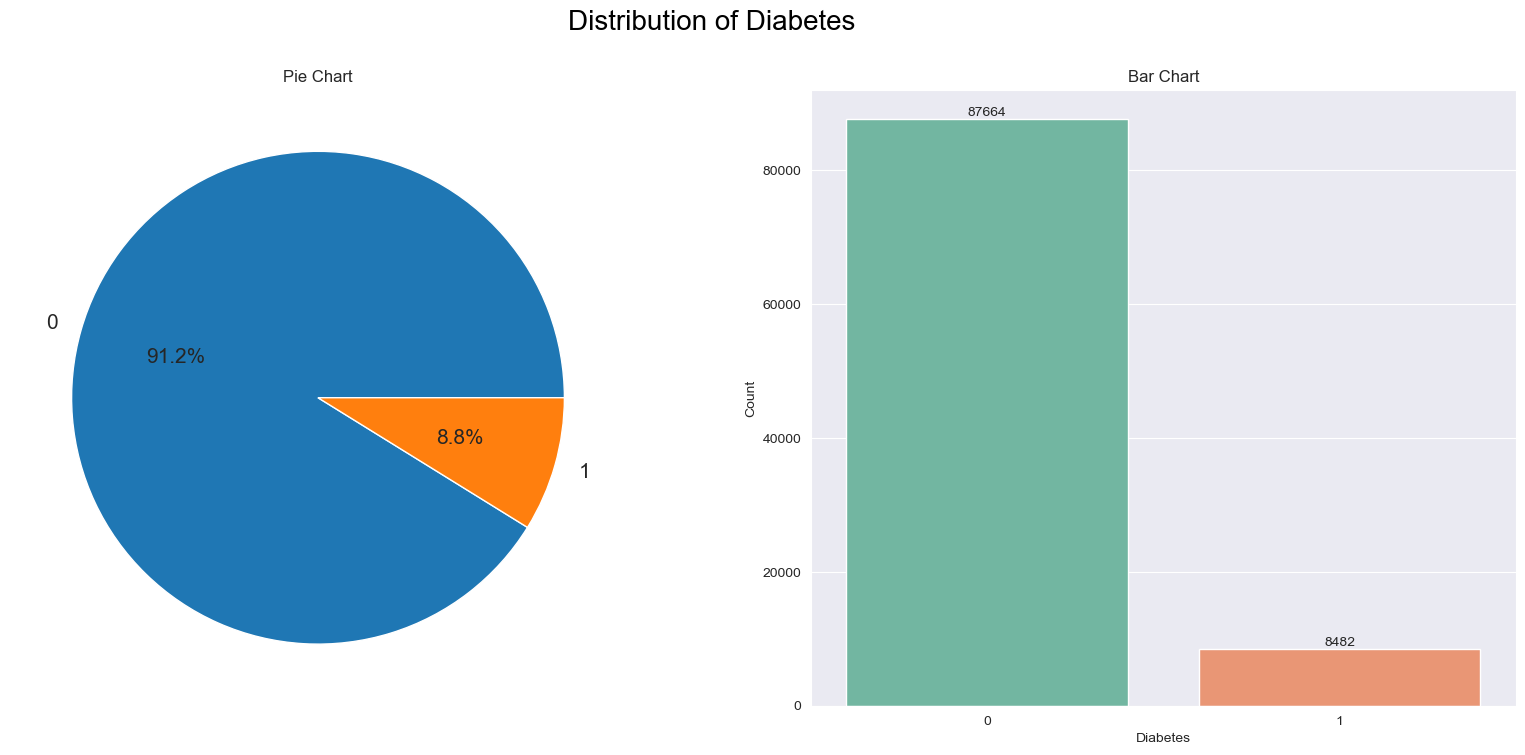

In [22]:
# Creating a figure with 2 subplots to visualize the distribution of Diabetes

plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
plt.suptitle('Distribution of Diabetes ', color = 'black', fontsize=20)

#subplot 1: Pie Chart
plt.subplot(1, 2, 1)
diabetes_counts = df['Diabetes'].value_counts()
diabetes_counts.plot(kind='pie', fontsize=15, autopct='%1.1f%%')
plt.title('Pie Chart')
plt.ylabel('')

# Subplot 2: Bar chart
plt.subplot(1, 2, 2)
ax = sns.countplot(x='Diabetes', data=df, palette='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Bar Chart')

plt.show()



In [23]:
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

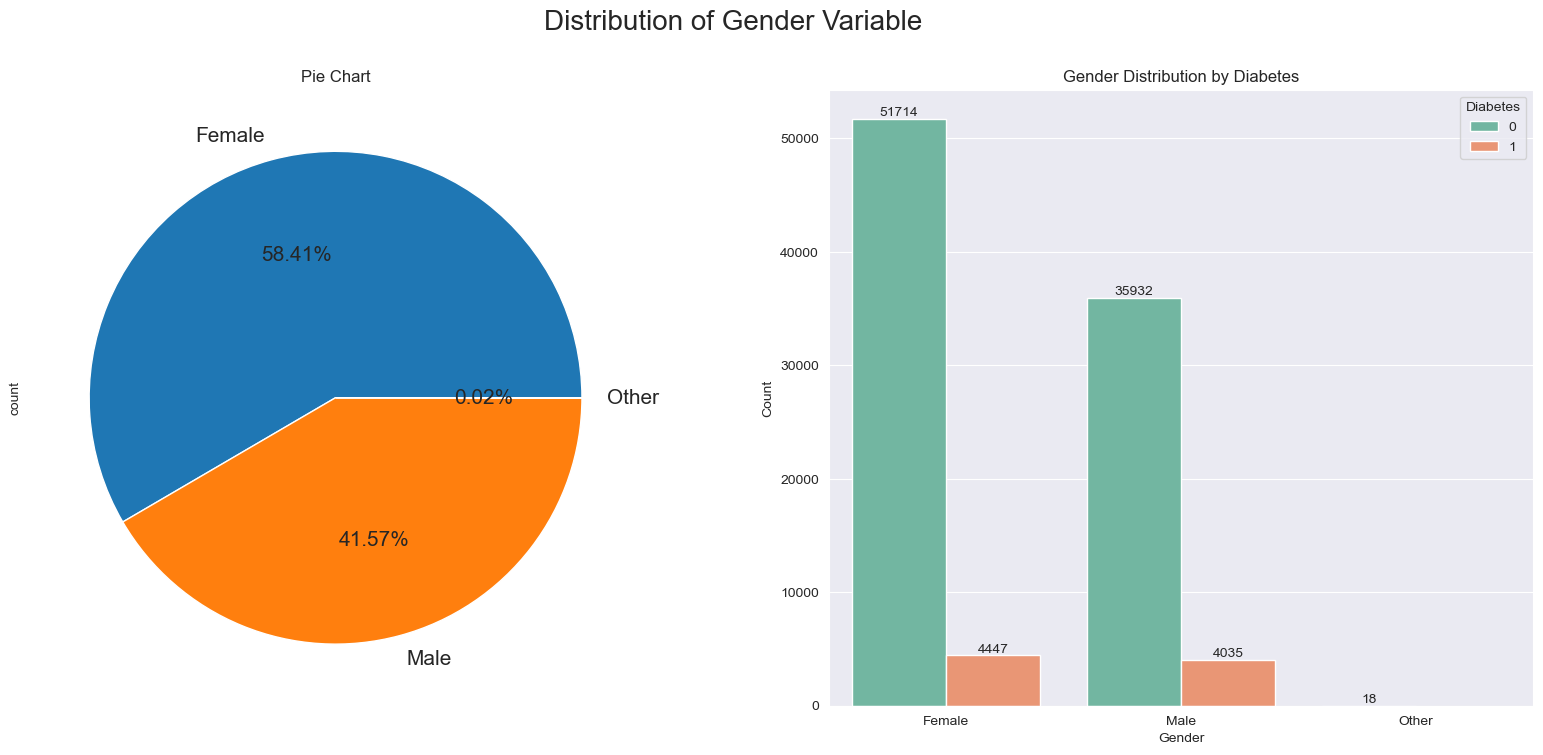

In [24]:
# 2 subplots to visualize the distribution of Gender and its distribution by Diabetes
plt.figure(figsize=(20,8))
plt.suptitle('Distribution of Gender Variable', fontsize=20)

# Subplot 1: Pie Chart
plt.subplot(1,2,1)
df['Gender'].value_counts().plot(kind='pie', fontsize=15, autopct='%1.2f%%')
plt.title('Pie Chart')

# Subplot 2: Bar chart grouped by Diabetes
plt.subplot(1, 2, 2)
ax = sns.countplot(x='Gender', hue='Diabetes', data=df, palette='Set2')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Gender Distribution by Diabetes')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes')
plt.show()


In [25]:
def distributionChart(df, features, group_col='Diabetes'):

    for col in features:
        plt.figure(figsize=(18, 6))
        sns.set_style('darkgrid')
        plt.suptitle(f'Distribution of {col} by {group_col}', fontsize=20)

        # -----------------------
        # Subplot 1: Histogram + KDE by group
        # -----------------------
        plt.subplot(1, 2, 1)
        for group_value in sorted(df[group_col].unique()):
            subset = df[df[group_col] == group_value]
            sns.kdeplot(subset[col], label=f'{group_col} = {group_value}', fill=True, alpha=0.4)

        plt.xlabel(col)
        plt.ylabel('Density')
        plt.title(f'KDE Distribution of {col} by {group_col}')
        plt.legend()

        # -----------------------
        # Subplot 2: Boxplot by group
        # -----------------------
        plt.subplot(1, 2, 2)
        sns.boxplot(x=group_col, y=col, data=df, palette='Set2')
        plt.xlabel(group_col)
        plt.ylabel(col)
        plt.title(f'Boxplot of {col} by {group_col}')

        # Layout & show
        plt.tight_layout()
        plt.show()


In [26]:
num = df.select_dtypes('number').columns
num

Index(['Age', 'BMI', 'HbA1c_Level', 'Blood_Glucose_Level'], dtype='object')

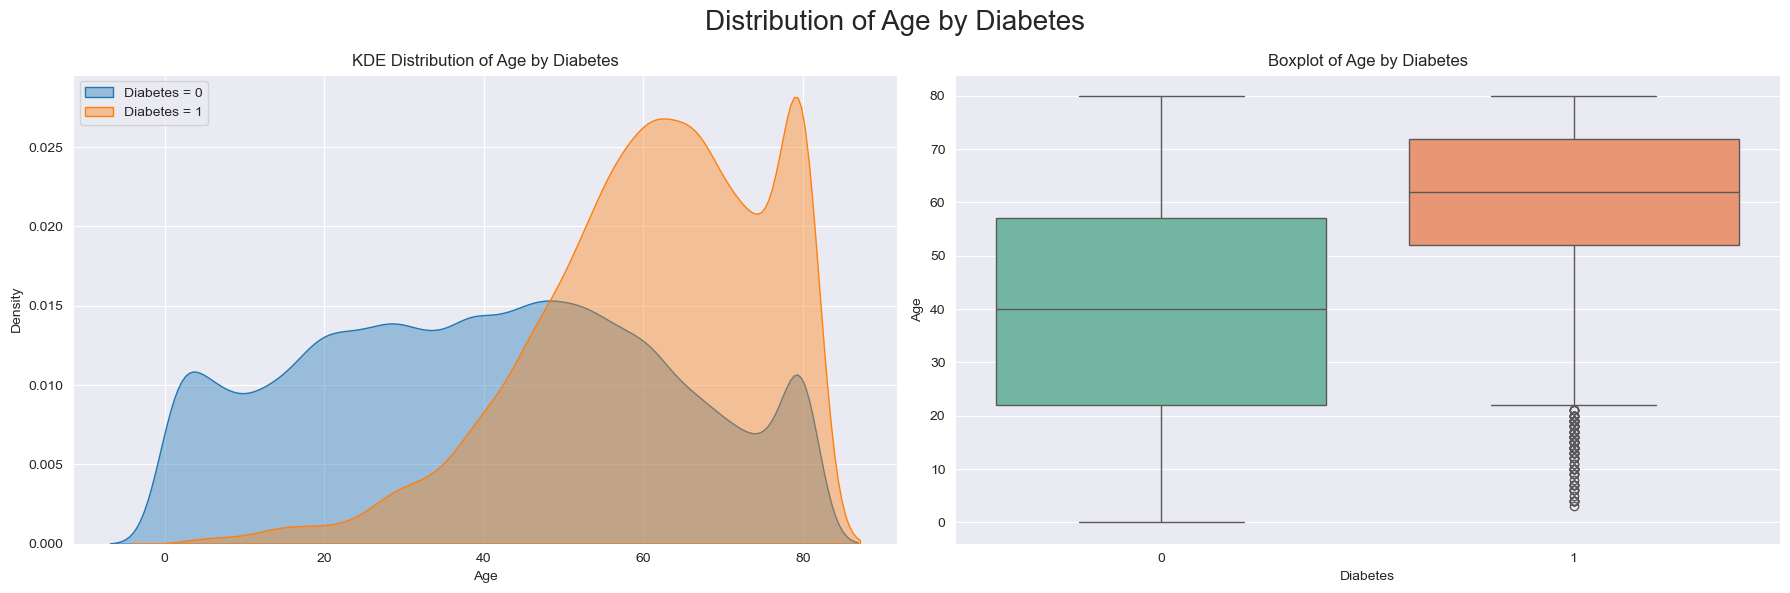

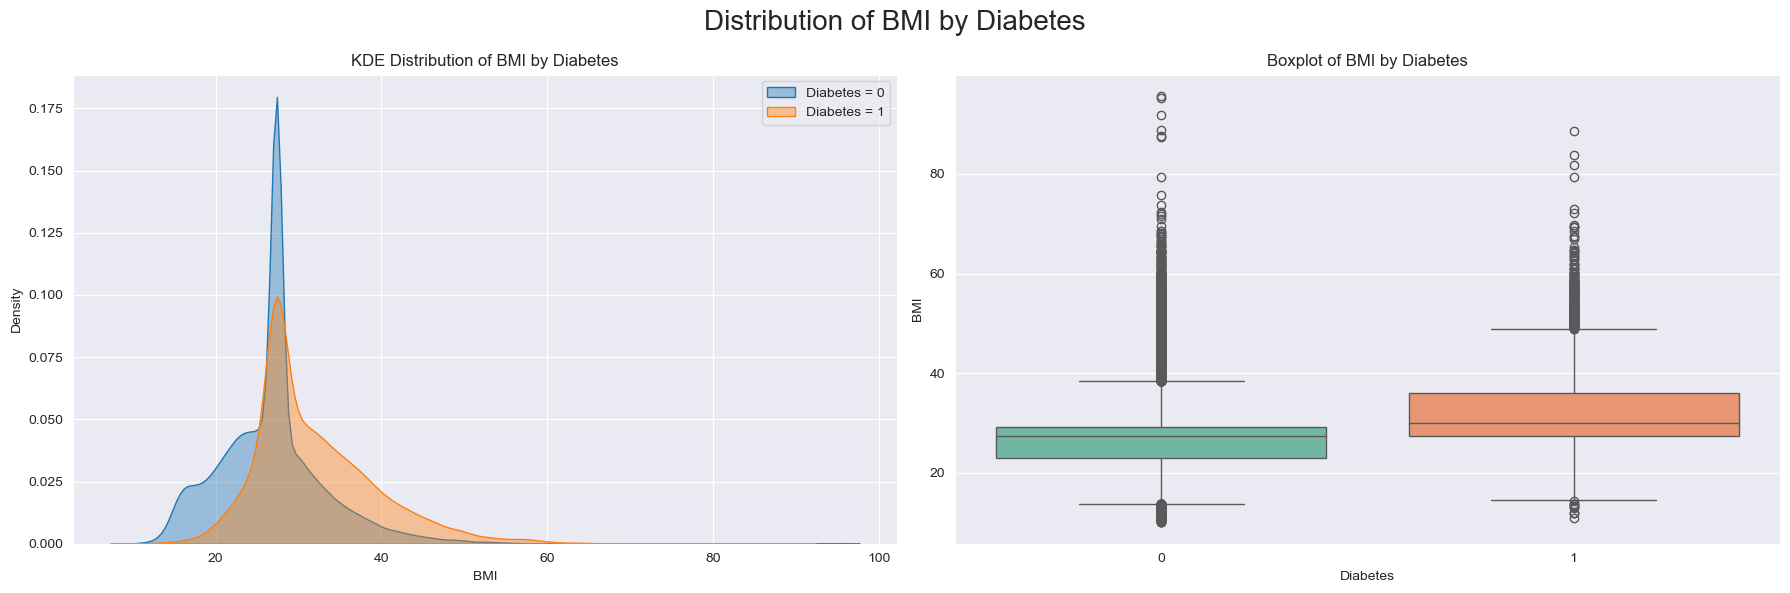

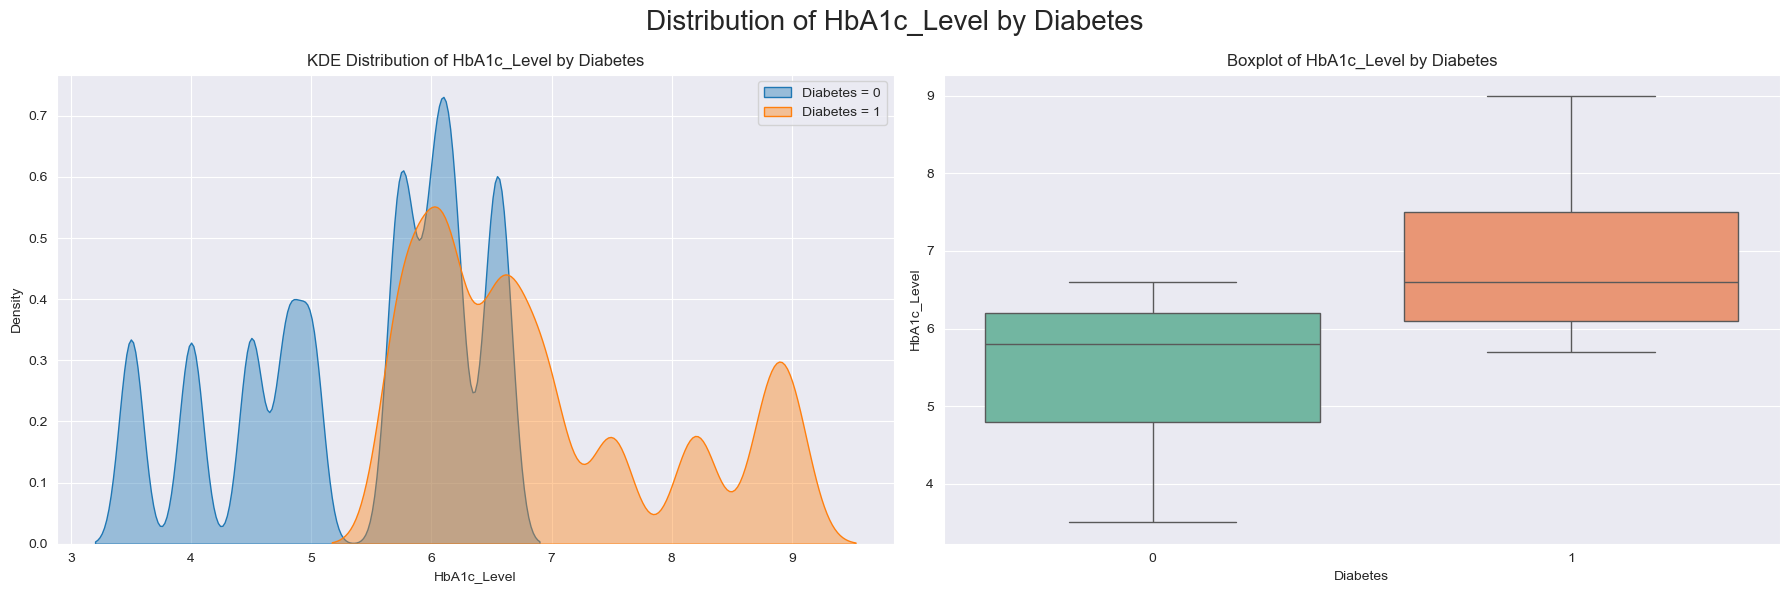

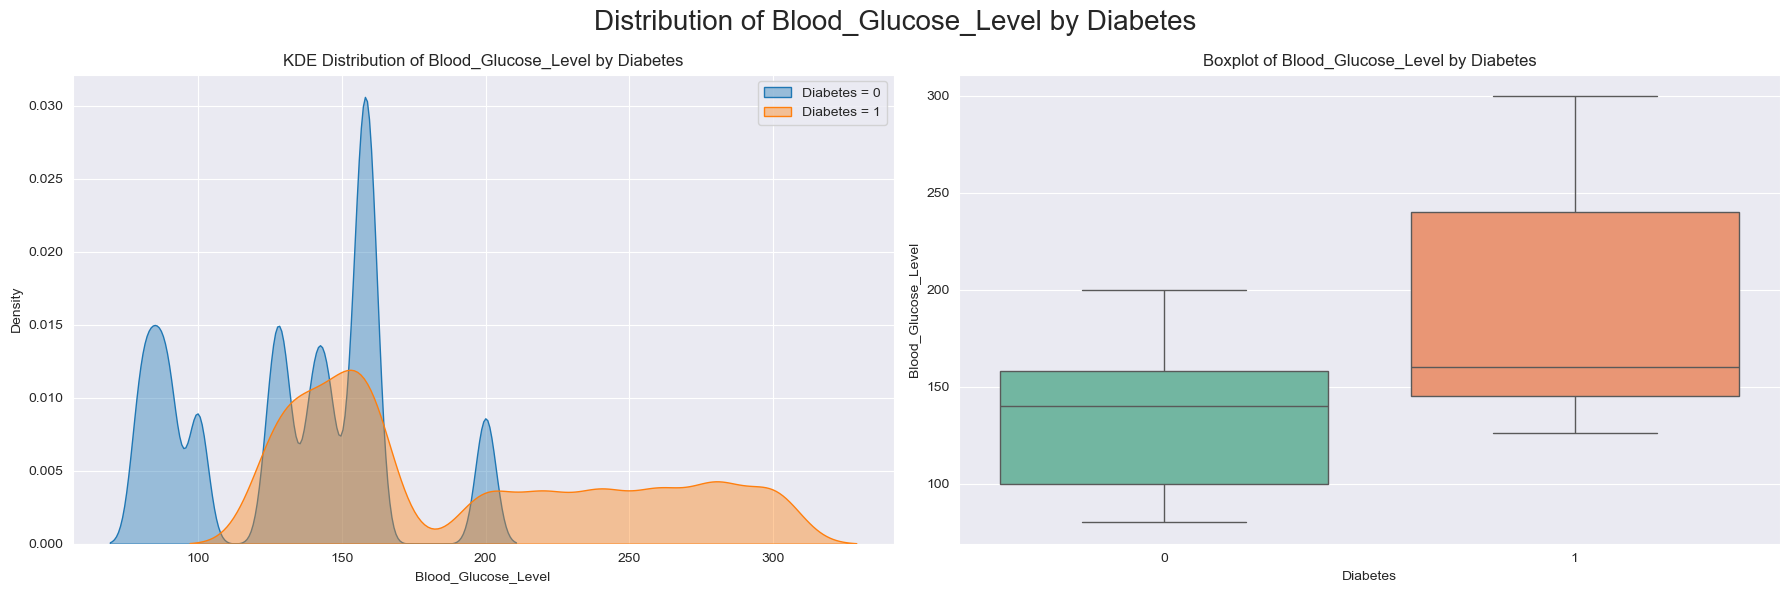

In [27]:
# Using the function to plot the distribution of numeric features
distributionChart(df,num, group_col='Diabetes')

In [28]:
print('---------Mean-------------')
for col in num:
	print(f"{col}: {df[col].mean()}")
print()

print('---------Median-------------')
for col in num:
	print(f"{col}: {df[col].median()}")
print()


---------Mean-------------
Age: 41.78375595448588
BMI: 27.32146111122668
HbA1c_Level: 5.532608740873255
Blood_Glucose_Level: 138.21823060761758

---------Median-------------
Age: 43.0
BMI: 27.32
HbA1c_Level: 5.8
Blood_Glucose_Level: 140.0



### Principal Component Analysis (PCA)

In [29]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.select_dtypes(include=[np.number]))
x_scaled[0]

array([ 1.6998527 , -0.29005038,  4.84853426, -0.31494707,  0.99456295,
        0.04355386, -0.31105594])

In [30]:
# Define feature set and target variable
feature = ['Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Smoking_History',
              'BMI', 'HbA1c_Level', 'Blood_Glucose_Level']
x = df[feature]
y = df['Diabetes']

In [31]:
# Value Counts of y and check if one individual has diabetes or not
# 0: No Diabetes, 1: Has Diabetes
y.value_counts()

Diabetes
0    87664
1     8482
Name: count, dtype: int64

In [32]:
# Applying PCA

pca = PCA()
x_pca = pca.fit_transform(x_scaled)

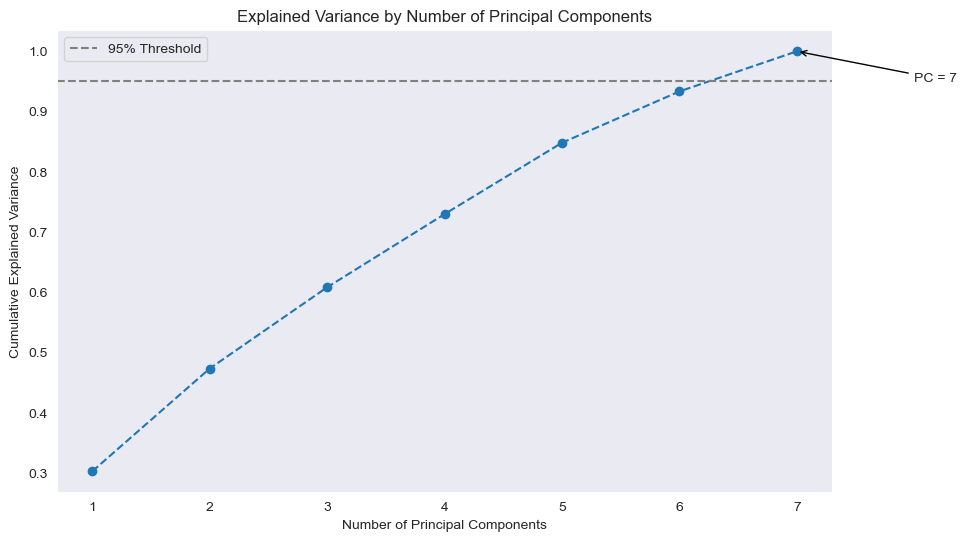

Principal Component 1: 0.3036 cumulative explained variance
Principal Component 2: 0.4740 cumulative explained variance
Principal Component 3: 0.6087 cumulative explained variance
Principal Component 4: 0.7301 cumulative explained variance
Principal Component 5: 0.8484 cumulative explained variance
Principal Component 6: 0.9335 cumulative explained variance
Principal Component 7: 1.0000 cumulative explained variance


In [33]:
# Compute the cumulative explained variance
cum_var = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
sns.set_style('darkgrid')
plt.plot(
    range(1, len(cum_var) + 1),
    cum_var,
    marker='o',
    linestyle='--'
)
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

# Define the threshold for explained variance (e.g., 95%)
threshold = 0.95

# Find the number of components needed to reach the threshold
n_components = (cum_var >= threshold).argmax() + 1  # +1 because Python index starts at 0

# Annotate the chosen point on the plot with a black arrow
plt.axhline(y=threshold, color='gray', linestyle='--', label=f'{int(threshold*100)}% Threshold')
plt.annotate(
    f'PC = {n_components}',
    xy=(n_components, cum_var[n_components - 1]),
    xytext=(n_components + 1, cum_var[n_components - 1] - 0.05),
    arrowprops=dict(color='black', arrowstyle='->'),
    fontsize=10
)
plt.legend()
plt.show()

# Print cumulative explained variance for each principal component
for i, ratio in enumerate(cum_var):
    print(f'Principal Component {i+1}: {ratio:.4f} cumulative explained variance')

# Apply PCA again using the optimal number of components
pca = PCA(n_components=n_components)
x_pca = pca.fit_transform(x_scaled)


**=> The best compoment is 7**

In [34]:
# save data after clean
df.to_csv('D:/study/DS/Data-Science/Practice/Diabetes_Predict/diabetes_dataset_cleaned.csv', index=False)
print("Data saved successfully!")

Data saved successfully!


## **BUILD MODEL**

### **1. KNN**

In [35]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(x_test)

# Evaluate the KNN model
accuracy_knn = round(accuracy_score(y_test, y_pred_knn) * 100, 2)

print(f'KNN Accuracy: {accuracy_knn:.2f}%')
print('R2 Score: ', str(round(r2_score(y_test, y_pred_knn)*100,2))+ '%')
print('Trainning Score: ', str(round(knn.score(x_train, y_train)*100, 1)) + '%')
print('Testing Score: ', str(round(knn.score(x_test, y_test)*100, 1)) + '%')
print('Mean Squared Error: ', str(round(mean_squared_error(y_test, y_pred_knn)*100,4))+ '%')

print(f'KNN Classification Report:\n{classification_report(y_test, y_pred_knn)}')


KNN Accuracy: 100.00%
R2 Score:  100.0%
Trainning Score:  100.0%
Testing Score:  100.0%
Mean Squared Error:  0.0%
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17509
           1       1.00      1.00      1.00      1721

    accuracy                           1.00     19230
   macro avg       1.00      1.00      1.00     19230
weighted avg       1.00      1.00      1.00     19230



### **2. XGBoots**

In [36]:
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=180,
              n_jobs=None, num_parallel_tree=None, ...)

In [37]:
# Making predictions on the test set
y_pred = xgb.predict(x_test)

# Evaluate the model
accuracy= round(accuracy_score(y_test, y_pred) * 100, 2)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'XGBBoot Accuracy: {accuracy}%')
print('R2 Score: ', str(round(r2_score(y_test, y_pred)*100,2))+ '%')
print('Trainning Score: ', str(round(xgb.score(x_train, y_train)*100, 1)) + '%')
print('Testing Score: ', str(round(xgb.score(x_test, y_test)*100, 1)) + '%')
print('Mean Squared Error: ', str(round(mean_squared_error(y_test, y_pred)*100,4))+ '%')

print(f'XGBoost Classification Report:\n{classification_report(y_test, y_pred)}')


XGBBoot Accuracy: 99.99%
R2 Score:  99.94%
Trainning Score:  100.0%
Testing Score:  100.0%
Mean Squared Error:  0.0052%
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17509
           1       1.00      1.00      1.00      1721

    accuracy                           1.00     19230
   macro avg       1.00      1.00      1.00     19230
weighted avg       1.00      1.00      1.00     19230



### Random Forest

In [38]:
rfc = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [39]:
y_pred_rfc = rfc.predict(x_test)

# Evaluate the Random Forest model
accuracy_rfc = round(accuracy_score(y_test, y_pred_rfc) * 100, 2)


print(f'Random Forest Accuracy: {accuracy_rfc:.2f}%')
print('R2 Score: ', str(round(r2_score(y_test, y_pred_rfc)*100,2))+ '%')
print(f'Random Forest Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rfc)}')
print('Trainning Score: ', str(round(rfc.score(x_train, y_train)*100, 1)) + '%')
print('Testing Score: ', str(round(rfc.score(x_test, y_test)*100, 1)) + '%')
print('Mean Squared Error: ', str(round(mean_squared_error(y_test, y_pred_rfc)*100,4))+ '%')

print(f'Random Classification Report:\n{classification_report(y_test, y_pred_rfc)}')



Random Forest Accuracy: 100.00%
R2 Score:  100.0%
Random Forest Confusion Matrix:
[[17509     0]
 [    0  1721]]
Trainning Score:  100.0%
Testing Score:  100.0%
Mean Squared Error:  0.0%
Random Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17509
           1       1.00      1.00      1.00      1721

    accuracy                           1.00     19230
   macro avg       1.00      1.00      1.00     19230
weighted avg       1.00      1.00      1.00     19230



### **Model Comparison**

In [40]:
pd.DataFrame({
    'Model': ['KNN', 'XGBoost', 'Random Forest'],
    'Score': [accuracy_knn, accuracy, accuracy_rfc]
})


,Model,Score
0,KNN,100.00
1,XGBoost,99.99
2,Random Forest,100.00


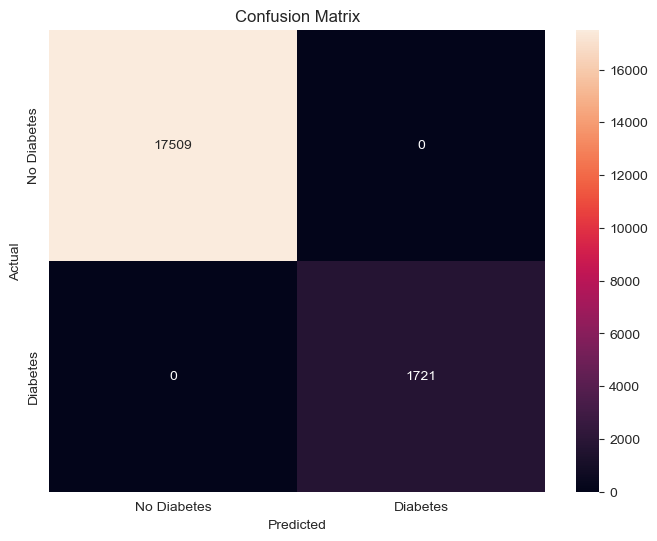

In [41]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rfc)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
import pickle
# Save the model
with open('diabetes_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)
    

## **CONCLUSION**

In this project, I conducted a thorough analysis and prediction of diabetes using a real-world dataset of about 100,000 records. After removing duplicates and handling missing data, the quality of analysis is ensured.
- The data is imbalanced: 91.2% non-diabetic, 8.8% diabetic. This should be considered when evaluating models.
- The average age is 41.8, with most diabetic cases concentrated in people over 50.
- The numeric variables HbA1c_Level (0.41), Blood_Glucose_Level (0.42), and Age (0.26) have the highest correlation coefficients with diabetes.
- Women tend to have a higher risk of diabetes than men (with higher average values of HbA1c, Glucose, and BMI).
- Some outlier values may be influenced by other factors such as genetics, lifestyle, diet, or living environment, affecting diabetes risk.
- The preprocessing steps (one-hot encoding, scaling, PCA) improve prediction performance and reduce data noise.
- KNN, XGBoost, and Random Forest models all achieved high accuracy. Random Forest was selected as the final model due to its stable performance and good generalization.
- Evaluation metrics (accuracy, precision, recall, F1-score) are all high, with a low number of misclassifications.
